In [71]:
import pandas as pd
import numpy as np
import os

In [72]:
data = pd.read_csv(r"C:\Users\Dell\Documents\BOOTCAMP\HaloTech Academy\Data Science Credit Loan\lc_2016_2017.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\181148551.py:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Dell\Documents\BOOTCAMP\HaloTech Academy\Data Science Credit Loan\lc_2016_2017.csv")


In [73]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [74]:
#karena disini gak ada Target variable, kita akan membuat sendriri untuk mengethaui Good/Bad Loan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [75]:
data['loan_status'].unique() 
'''artinya status dari loadn ada Current, Fully Paid, Charged Off, Late (31-120 days), In Grace Period, Default, Does not meet the credit policy. Status:Fully Paid and Current are considered Good Loan, 
sedangkan Charged Off, Late (31-120 days), In Grace Period, Default, Does not meet the credit policy dianggap Bad Loan'''

'artinya status dari loadn ada Current, Fully Paid, Charged Off, Late (31-120 days), In Grace Period, Default, Does not meet the credit policy. Status:Fully Paid and Current are considered Good Loan, \nsedangkan Charged Off, Late (31-120 days), In Grace Period, Default, Does not meet the credit policy dianggap Bad Loan'

In [76]:
#disini 0=Good Loan, 1=Bad Loan
data['good_bad'] = np.where(data['loan_status'].isin(['Current','Fully Paid', 'In Grace Period']),0,1)

In [77]:
data['good_bad']

0         0
1         0
2         0
3         0
4         0
         ..
759333    0
759334    0
759335    1
759336    0
759337    0
Name: good_bad, Length: 759338, dtype: int64

In [78]:
#disini 0 (good loan) ada Current, Fully Paid, In Grace Period
#sedangkan 1 (bad loan) ada Charged Off, Late (31-120 days)
data[['loan_status', 'good_bad']].value_counts() 

loan_status         good_bad
Current             0           565523
Fully Paid          0           130718
Charged Off         1            37197
Late (31-120 days)  1            15354
In Grace Period     0             6634
Late (16-30 days)   1             3876
Default             1               36
Name: count, dtype: int64

In [79]:
missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0]) #shape terdiri dari rows x column berarti shape[0] adalah jumlah rows
#artinya jumlah data null dibagi dengan jumlah rows yang menghasilkan persentase

In [80]:
#kita mau tau berapa persen missing value di atas 50%
missing_values = missing_values[missing_values[0] > 0.5]
missing_values.sort_values([0], ascending=False, inplace=True)
missing_values

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
verification_status_joint,0.955220
annual_inc_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [81]:
#untuk misisng value > 50% akan dihapus
#kenapa gak di fill? karena kalo diisi takutnya gak AKURAT

data.dropna(thresh=data.shape[0]*0.5, axis=1,inplace=True)

# missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0])
# missing_values = missing_values[missing_values[0] > 0.5]
# missing_values.sort_values([0], ascending=False, inplace=True)
# missing_values


DATA SPLITTING
KENAPA? karena dalam kasus ini tidak ada train dan test sehingga kita bagi jadi 80 train dan 20 testing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
#JADI dalam machine learnning variabel X = predictor, variabel Y = target
x = data.drop('good_bad', axis=1) #kolom goood_bad di drop karena ini adalah target variable
y = data['good_bad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [84]:
y_train.value_counts(normalize=True) #normalize untuk mendapatkan persentase


good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

In [85]:
y_test.value_counts(normalize=True)

good_bad
0    0.925639
1    0.074361
Name: proportion, dtype: float64

# DATA CLEANING  
### Kita akan membuang atau mengubah data yang non numerik  
Biasanya data cleaning yang mencakup pengubahan ke int, missing value DILAKUKAN STLH train test split

In [86]:
for col in x_train.select_dtypes(include=['object', 'bool']).columns:
    print(col)
    print(x_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

In [87]:
#disini data yang bisa diubah jadi numerik dikelompokan dulu
col_need_to_clean = ['term','emp_length','issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']

In [88]:
x_train['term'] = pd.to_numeric(x_train['term'].str.replace('months','').str.strip()) #strip untuk menghapus spasi

In [89]:
x_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [90]:
x_train['emp_length'] = x_train['emp_length'].str.replace('+ years','').str.replace('years','').str.replace('< 1 year','0').str.replace('year','').str.strip()
x_train['emp_length'].fillna(value=0,inplace=True)
x_train['emp_length'] = pd.to_numeric(x_train['emp_length'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\1666158409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['emp_length'].fillna(value=0,inplace=True)


In [91]:
x_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [92]:
#Data tadi akan ada dlm bentuk tgl, kita akan ubah menjadi datetime
col_to_datetime = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
x_train[col_to_datetime]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [93]:
for col in col_to_datetime:
    x_train[col] = pd.to_datetime(x_train[col])

C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3529564433.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_train[col] = pd.to_datetime(x_train[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3529564433.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_train[col] = pd.to_datetime(x_train[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3529564433.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_train[col] = pd.to_datetime(x_train[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3529564433.py:2: UserWarning: Could not infer format, so each eleme

In [94]:
x_train[col_to_datetime]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [95]:
x_train[col_need_to_clean].info() #disini sudah sukses mengubah kolom yang tadinya non numerik menjadi numerik

<class 'pandas.core.frame.DataFrame'>
Index: 607470 entries, 147577 to 165904
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                607470 non-null  int64         
 1   emp_length          607470 non-null  int64         
 2   issue_d             607470 non-null  datetime64[ns]
 3   earliest_cr_line    607470 non-null  datetime64[ns]
 4   last_pymnt_d        606735 non-null  datetime64[ns]
 5   next_pymnt_d        473147 non-null  datetime64[ns]
 6   last_credit_pull_d  607453 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 37.1 MB


In [96]:
#X_TEST juga perlu dilakukan hal yang sama
x_test['term'] = pd.to_numeric(x_test['term'].str.replace('months','').str.strip()) #strip untuk menghapus spasi
x_test['emp_length'] = x_test['emp_length'].str.replace('+ years','').str.replace('years','').str.replace('< 1 year','0').str.replace('year','').str.strip()
x_test['emp_length'].fillna(value=0,inplace=True)
x_test['emp_length'] = pd.to_numeric(x_test['emp_length'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\2557963795.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['emp_length'].fillna(value=0,inplace=True)


In [97]:
for col in col_to_datetime:
    x_test[col] = pd.to_datetime(x_test[col])

C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3095702495.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_test[col] = pd.to_datetime(x_test[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3095702495.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_test[col] = pd.to_datetime(x_test[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3095702495.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_test[col] = pd.to_datetime(x_test[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4968\3095702495.py:2: UserWarning: Could not infer format, so each element wil

In [98]:
x_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


In [99]:
#dalam kasus ini next_pymnet tidak dibutuhkan dulu
x_train = x_train[col_need_to_clean]
x_test = x_test[col_need_to_clean]

In [100]:
del x_train['next_pymnt_d']
del x_test['next_pymnt_d']

print(x_train)
print()
print(x_test)

        term  emp_length    issue_d earliest_cr_line last_pymnt_d  \
147577    36           4 2017-02-01       1994-08-01   2017-12-01   
505776    36          10 2016-04-01       2001-09-01   2017-07-01   
412425    36           0 2017-07-01       1999-05-01   2017-12-01   
618730    36           5 2016-10-01       2005-06-01   2017-12-01   
111143    36           6 2017-03-01       2012-01-01   2017-12-01   
...      ...         ...        ...              ...          ...   
150426    36           8 2017-02-01       1998-11-01   2017-11-01   
195135    36           0 2017-01-01       1993-09-01   2017-12-01   
182511    36          10 2017-01-01       1988-03-01   2017-12-01   
82596     36           3 2017-04-01       2003-01-01   2017-12-01   
165904    36           1 2017-02-01       2000-11-01   2017-12-01   

       last_credit_pull_d  
147577         2017-12-01  
505776         2017-11-01  
412425         2017-12-01  
618730         2017-12-01  
111143         2017-12-01  
...

In [101]:
import datetime
from datetime import date

In [102]:
#fungsi untuk meengubah tanggal tadi semua menjadi numerik
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format= '%b-%y')
    df['mths_since_' + column] = (today_date.year - df[column].dt.year) * 12 + (today_date.month - df[column].dt.month)
    df.drop(columns=[column], inplace=True) #menghapus kolom yang sudah diubah menjadi numerik

In [103]:
date_columns(x_train, 'issue_d')
date_columns(x_train,'earliest_cr_line')
date_columns(x_train,'last_pymnt_d')
date_columns(x_train,'last_credit_pull_d')

date_columns(x_test, 'issue_d')
date_columns(x_test,'earliest_cr_line')
date_columns(x_test,'last_pymnt_d')
date_columns(x_test,'last_credit_pull_d')

In [104]:
x_train

,term,emp_length,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,102,372,92.0,92.0
505776,36,10,112,287,97.0,93.0
412425,36,0,97,315,92.0,92.0
618730,36,5,106,242,92.0,92.0
111143,36,6,101,163,92.0,92.0
...,...,...,...,...,...,...
150426,36,8,102,321,93.0,92.0
195135,36,0,103,383,92.0,92.0
182511,36,10,103,449,92.0,92.0
82596,36,3,100,271,92.0,92.0


In [105]:
x_test

,term,emp_length,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
280647,60,10,109,309,99.0,92.0
419992,36,7,97,235,92.0,92.0
44633,36,0,99,584,93.0,99.0
245940,36,2,108,236,93.0,92.0
565744,36,0,105,658,92.0,92.0
...,...,...,...,...,...,...
70748,36,4,99,161,92.0,92.0
43047,60,4,99,277,92.0,92.0
99030,36,0,100,264,92.0,101.0
625689,36,1,113,156,92.0,92.0


In [106]:
print("nilai nul Xtrain", x_train.isnull().sum())
print()
print("nilai nul Xtest", x_test.isnull().sum())

nilai nul Xtrain term                               0
emp_length                         0
mths_since_issue_d                 0
mths_since_earliest_cr_line        0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

nilai nul Xtest term                               0
emp_length                         0
mths_since_issue_d                 0
mths_since_earliest_cr_line        0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64


In [107]:
#dalam kasus ini untuk nilai null kita isi median
x_train.fillna(x_train.median(), inplace=True)
x_test.fillna(x_test.median(), inplace=True)

print("nilai nul Xtrain", x_train.isnull().sum())
print()
print("nilai nul Xtest", x_test.isnull().sum())

nilai nul Xtrain term                             0
emp_length                       0
mths_since_issue_d               0
mths_since_earliest_cr_line      0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

nilai nul Xtest term                             0
emp_length                       0
mths_since_issue_d               0
mths_since_earliest_cr_line      0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64


# Modeling  
### Rule of thumb nya pakai model tersimple. Kalo hasil masih jelek antara tambah data ataau pakai model lain

In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [109]:
#kemudian kita fit kan model. Nah apa yang di fit kan?
# x_train dan y_train nya. Ibarrat  kita belajar (x_train dan y_train) mau menghadapi ujian (x_test).
model.fit(x_train, y_train)
y_pred = model.predict(x_test) #y_pred adalah jawaban ujian kita. Nah untuk mencocokan kunci jawaban maka y_test dipakai

c:\Users\Dell\Documents\PROJECT ABAL\ML Envirom\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
result

#disini pred adalah jawaban ujian, edangkan y_test adalah kunci jawaban

,y_test,y_pred
280647,1,0
419992,0,0
44633,0,0
245940,0,0
565744,0,0
...,...,...
70748,0,0
43047,0,0
99030,0,0
625689,0,0


In [111]:
#Nentuin akurasi
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f"nilai akurasi {accuracy_score(y_test, y_pred):.3f}")


nilai akurasi 0.917


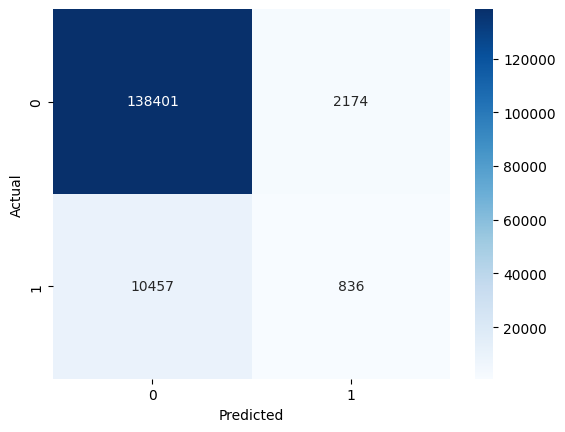

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

### Namun dalam dataset ini imbalance karena data 0 dan 1 gak seimbang makanya kita masuk ke MODELING 2

In [113]:
#karena fokus kita adalah yang BAD LOAN yang gagal bayar (1)

y_pred = model.predict_proba(x_test)[:, 1] #[:,1] untuk mendapatkan probabilitas dari prediksi, khususnya untuk kelas 1 (bad loan)

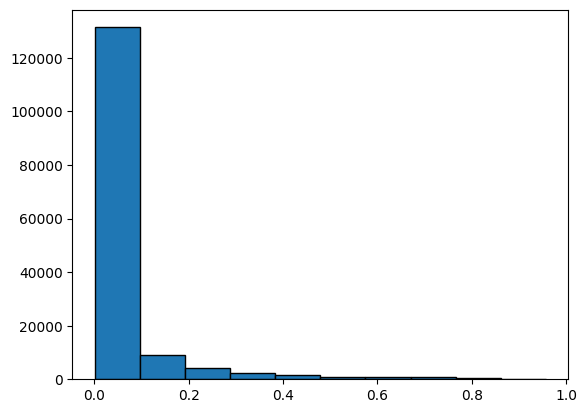

In [114]:
(y_pred > 0.5).astype(int) #mengubah probabilitas menjadi 0 atau 1, threshold 50%
plt.hist(y_pred, bins=10, edgecolor='black')
plt.show()

#Masalahnya setelah plot, distribusi data banyak di kisaran 0-0,1. Maka nya kita gak bisa bikin threshold 50% untuk menentukan bad loan karena dataset ini imbalance

In [115]:
#nah karena dataset ini imabalance, Threshold gak bisa kita sett kalo lebih dari 50% maka data bad loan. 
# karena itu mesti buat threshold sendiri

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

thresholds

array([       inf, 0.95679532, 0.93364629, ..., 0.00187274, 0.00186438,
       0.00131386])

In [117]:
#j youden statistic
j = tpr - fpr
ix = np.argmax(j)
best_thresh = thresholds[ix]

best_thresh

np.float64(0.05985576807666374)

In [119]:
#karena kita udah dapet threshold nya, maka untuk yang > 0,059 akan dianggap bad loan

y_pred = model.predict_proba(x_test)[:,1]
y_pred = (y_pred > 0.059).astype(int)

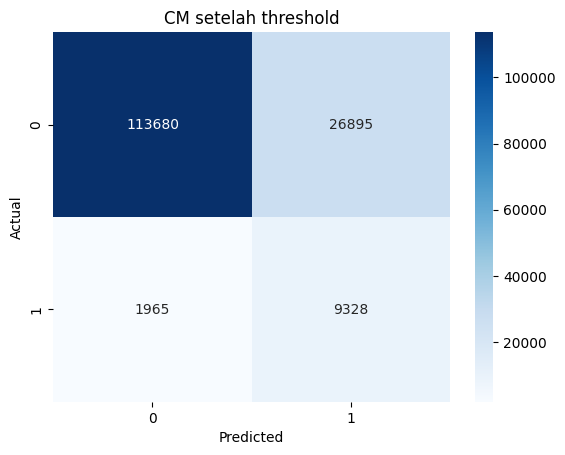

In [120]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CM setelah threshold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [124]:
model.intercept_, model.coef_

(array([-15.10128294]),
 array([[ 0.01575005, -0.00833991,  0.03587002, -0.00104164,  0.24246085,
         -0.1575175 ]]))

In [126]:
df_coeff = pd.DataFrame(model.coef_, columns=x_train.columns)
df_coeff

,term,emp_length,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.01575,-0.00834,0.03587,-0.001042,0.242461,-0.157517
